https://xavierbourretsicotte.github.io/lasso_implementation.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#Load the diabetes dataset. In this case we will not be using a constant intercept feature
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)

In [5]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,
                             lamda = .01, num_iters=100, 
                             intercept = False):
    
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [7]:
coordinate_descent_lasso(initial_theta,X,y,lamda = 1, num_iters=100)



array([  -7.64530767, -236.86417256,  522.20507214,  321.96751943,
       -563.94165407,  296.46087877,    0.        ,  147.56495839,
        666.99051766,   67.18963124])

In [10]:
theta_lasso

array([[  -9.36472624,    0.        ,    0.        ],
       [-238.93951069, -217.28461481,    0.        ],
       [ 521.25941471,  525.44587016,    0.        ],
       [ 323.48248321,  309.01717127,    0.        ],
       [-637.68954078, -166.69199237,    0.        ],
       [ 355.94799522,    0.        ,    0.        ],
       [  31.54537415, -174.74179674,    0.        ],
       [ 156.44171172,   73.19816797,    0.        ],
       [ 694.39328288,  525.18849413,    0.        ],
       [  67.74753487,   61.45656287,    0.        ]])

(0.06309573444801933, 1584.893192461114, -849.8147108555953, 820.6104516733536)

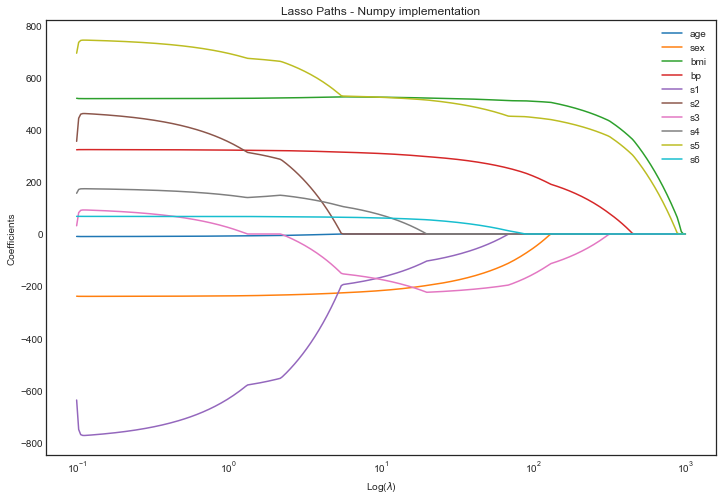

In [6]:
#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')